In [3]:
import warnings
warnings.filterwarnings("ignore")

# Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/Users/sayfulindmitry/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/sayfulindmitry/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Скачиваем данные

In [47]:
df_train = pd.read_csv('./X_train.csv')
df_test = pd.read_csv('./X_test.csv')

df_target = pd.read_csv('./y_train.csv')
df_test_sample = pd.read_csv('./y_test_sample.csv')

In [5]:
df_train.head()


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


In [51]:
df_test.head()



,index,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,143522,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,116747,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,66075,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,133292,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,83134,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0


In [52]:
df_full = pd.concat([df_train, df_target], axis=1, ignore_index=False)

In [53]:
df_full.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,target
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0,0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0,0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0,0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0,0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0,0


In [1]:
from sklearn.model_selection import train_test_split

In [16]:
df_train.drop(columns=['monthly_income', 'family_members'], inplace=True)

In [76]:
df_test.drop(columns=['monthly_income', 'family_members'], inplace=True)

In [ ]:
df_test.drop(columns=['monthly_income', 'family_members'], inplace=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size=0.3, random_state=42)

In [18]:
df_train.shape

(105109, 8)

In [19]:
X_train.shape

(73576, 8)

In [20]:
X_test.shape

(31533, 8)

In [21]:
X_train.shape[0] + X_test.shape[0]

105109

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree = DecisionTreeClassifier(random_state=17, max_depth=5)

In [54]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [55]:
y_pred = tree.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print(accuracy_score(y_test, y_pred))

0.9363523927314242


In [32]:
df_target['target'].value_counts()

0    98078
1     7031
Name: target, dtype: int64

In [33]:
X = df_train
y = df_target

In [34]:
from sklearn.model_selection import cross_val_score

In [44]:
%%time
cross_val = cross_val_score(tree, X, y, cv=5, n_jobs=4, scoring='accuracy')

CPU times: user 54.7 ms, sys: 24.6 ms, total: 79.3 ms
Wall time: 1.28 s


In [45]:
cross_val

array([0.89839699, 0.89877271, 0.89782133, 0.89738833, 0.89814947])

In [46]:
tree.feature_importances_

array([0.27962121, 0.13930562, 0.04495116, 0.25151834, 0.09551975,
       0.12589156, 0.03956607, 0.0236263 ])

# Краткий анализ имеющихся данных

###### Баланс классов

In [54]:
df_full['target'].value_counts(normalize=True)

0    0.933108
1    0.066892
Name: target, dtype: float64

###### Проверка пропусков

In [55]:
pd.isnull(df_full).sum()

credit_card_utilization           0
age                               0
overdue_30_59_days                0
debt_to_income                    0
monthly_income                20993
credits_loans                     0
overdue__more_than_90_days        0
mortgage_loans                    0
overdue_60_89_days                0
family_members                 2805
target                            0
dtype: int64

###### Проверка типов данных

In [56]:
df_full.dtypes

credit_card_utilization       float64
age                             int64
overdue_30_59_days              int64
debt_to_income                float64
monthly_income                float64
credits_loans                   int64
overdue__more_than_90_days      int64
mortgage_loans                  int64
overdue_60_89_days              int64
family_members                float64
target                          int64
dtype: object

###### Проверка количества уникальных

In [57]:
df_full.nunique()

credit_card_utilization        97475
age                               86
overdue_30_59_days                15
debt_to_income                102217
monthly_income                 82956
credits_loans                     59
overdue__more_than_90_days        16
mortgage_loans                    27
overdue_60_89_days                13
family_members                    13
target                             2
dtype: int64

###### Просмотр некоторых зависимостей

In [58]:
df_full['family_members'].value_counts(normalize=True)

0.0     0.594737
1.0     0.181078
2.0     0.133015
3.0     0.064465
4.0     0.019765
5.0     0.005259
6.0     0.001085
7.0     0.000323
8.0     0.000186
10.0    0.000049
9.0     0.000020
13.0    0.000010
20.0    0.000010
Name: family_members, dtype: float64

###### Выбор категориальных и количественных признаков

In [59]:
num = ['age', 'monthly_income', 'credit_card_utilization',
      'debt_to_income', 'credits_loans', 'mortgage_loans', 
      'family_members','overdue_30_59_days',
       'overdue_60_89_days',
      'overdue__more_than_90_days']

target = 'target'

# Предобработка данных

###### Заполнение пропусков

In [68]:
df_full['monthly_income'] = df_full['monthly_income'].fillna(0)
df_full['family_members'] = df_full['family_members'].fillna(0)

###### Проверка заполнения пропусков

In [69]:
pd.isnull(df_full).sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
target                        0
dtype: int64

In [71]:
df = df_full.iloc[:-100]
df_test = df_full.iloc[-100:]


In [73]:
df.target = df.target.astype(int)

###### Выбираем признаки для обучения

In [74]:
train_cols = df.columns.difference([target])

In [75]:
train_cols

Index(['age', 'credit_card_utilization', 'credits_loans', 'debt_to_income',
       'family_members', 'monthly_income', 'mortgage_loans',
       'overdue_30_59_days', 'overdue_60_89_days',
       'overdue__more_than_90_days'],
      dtype='object')

# Генерация признаков

###### Полиномиальные признаки

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
pf = PolynomialFeatures(degree=2)

In [78]:
# df = pf.fit_transform(df)

# Выбор модели и оптимизация

###### Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [65]:
dtc = DecisionTreeClassifier(random_state=17)
params = {'max_depth': [2, 3, 4, 5, 6, 7]} #'min_samples_split': [3,6], 
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [66]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc', n_jobs=-1)

In [67]:
GS_dtc.fit(X=X, y=y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [68]:
GS_dtc.best_score_

0.8430195700407146

In [69]:
GS_dtc.best_params_

{'max_depth': 6}

In [70]:
tree_best = GS_dtc.best_estimator_

# Fit to submit

In [80]:
%%time
tree_best.fit(X, y)

CPU times: user 241 ms, sys: 6.46 ms, total: 248 ms
Wall time: 247 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [82]:
tree_predictions = tree_best.predict_proba(df_test.iloc[:, 1:])

In [86]:
tree_predictions[:, 1]

array([0.01142543, 0.01142543, 0.0797577 , ..., 0.01142543, 0.08194741,
       0.01142543])

In [88]:
df_test_sample['target'] = tree_predictions[:, 1]

In [91]:
df_test_sample.to_csv('first_submit.csv', index=False)

In [92]:
pd.read_csv('first_submit.csv')

,index,target
0,143522,0.011425
1,116747,0.011425
2,66075,0.079758
3,133292,0.011425
4,83134,0.011425
5,127778,0.081947
6,53924,0.011425
7,19361,0.011425
8,43507,0.011425
9,62679,0.011425


###### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
import random

In [91]:
random.seed(123)

In [92]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 100)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [93]:
GS_LR.fit(X=df[train_cols], y=df[target])

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-07, 1.17681e-07, ..., 8.49753e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [94]:
# Лучшая модель при параметре "C"
GS_LR.best_params_

{'C': 0.014508287784959401}

In [95]:
# Лучший показатель ROC_AUC
GS_LR.best_score_

0.699670543334869

In [96]:
GS_LR

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-07, 1.17681e-07, ..., 8.49753e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

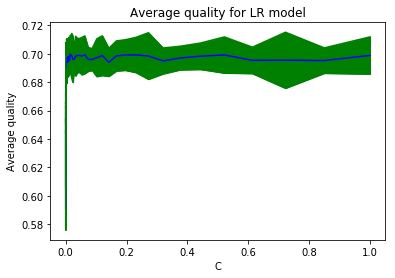

In [97]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LR model')
plt.show()

###### kNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [ ]:
GS_kNN.fit(df[train_cols], df[target])

In [ ]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

In [ ]:
# Лучший показатель ROC_AUC
GS_kNN.best_score_

In [ ]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Нормировка данных

Нормируем данные и проверяем качество

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler(with_mean=True, with_std=True)

In [ ]:
X_scaled = ss.fit_transform(df[train_cols])

In [ ]:
X_test_scaled = ss.transform(df_test[train_cols])

# Модели на нормированных данных

###### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [ ]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [ ]:
# Заменяем df[train_cols] на X_scaled
GS_dtc.fit(X=X_scaled, y=df[target])

In [ ]:
# Алгоритмы на деревьях не чуствительны к масштабированию данных, поэтому скор не изменился
GS_dtc.best_score_

Скор не большой, так как мы перебрали не все параметры

Попробуйте факультативно попробовать поварьировать другие параметры и добиться лучшего ROC_AUC

###### Logistic Regression

In [ ]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 100)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [ ]:
GS_LR.fit(X=X_scaled, y=df[target])

In [ ]:
# Лучший параметр "C" сильно уменьшился,
# Так как мы нормировали данные и теперь надо меньше штрафовать большие веса
GS_LR.best_params_

In [ ]:
GS_LR.best_score_

###### kNN

In [ ]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [ ]:
GS_kNN.fit(X_scaled, df[target])

In [ ]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

In [ ]:
# Показатель метрики ROC_AUC сильно увеличился после нормировки (с 0.59 до 0.75),
# Так как метрические алгоритмы очень чуствительны к ненормированным данным.
GS_kNN.best_score_

In [ ]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Blending

Подробнее про ансамбли хорошо объясняется здесь:

https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/

In [ ]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier

###### Выбираем наши лучшие модели (модели при лучших параметрах)

In [ ]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре

In [ ]:
# Передаем в VotingClassifier наши модели для ансамбля
vc = VotingClassifier([('kNN', kNN_model), ('LR', LR_model)], voting='soft')

In [ ]:
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации
grid = GridSearchCV(estimator=vc,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid.fit(X_scaled, df[target].values)

In [ ]:
grid.best_params_

In [ ]:
# Лучший показатель ROC_AUC
grid.best_score_

In [ ]:
# Напомним
print("Качество алгоритма kNN =", GS_kNN.best_score_)
print("Качество алгоритма LogReg =", GS_LR.best_score_)
print("Качество алгоритма ансамбля kNN и LogReg =", grid.best_score_)

Стало лучше)

### Делаем предсказания на тесте

In [ ]:
model = grid.best_estimator_

In [ ]:
model.fit(X_scaled, df['Risk'])

In [ ]:
preds = model.predict_proba(X_test_scaled)[:, 1]

### Готовим предсказания на отправку

In [ ]:
df_test['Risk'] = preds

In [ ]:
df_test = df_test[['Risk']]

In [ ]:
df_test.to_csv('./submition.csv')

### Посмотрим финальный score

In [74]:
from sklearn.metrics import roc_auc_score

In [75]:
answers = pd.read_csv('./answers.csv', index_col=0)

In [76]:
answers.Risk = answers.Risk.map({'good': 0, 'bad': 1})

In [78]:
roc_auc_score(y_true=answers.Risk.values, y_score=preds)

0.7679227941176471

_____

_____

_____

_____

_____

_____

_____